<a href="https://colab.research.google.com/github/andreiamferreira/diagnostico-imagem/blob/modelo-multicamadas/Multicamadas_anotacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn.metrics as skm
import seaborn as sns

%config Completer.use_jedi = False

import warnings
warnings.simplefilter("ignore")

from sklearn.model_selection import train_test_split

In [68]:
# importação de dataset do próprio tensor flow
fashion_mnist = keras.datasets.fashion_mnist

# divisao entre treinamento e teste
# arrays train_images e train_labels são o conjunto de treinamento— os dados do modelo usados para aprender
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Número total de outputs :  10
Classes de saída :  [0 1 2 3 4 5 6 7 8 9]


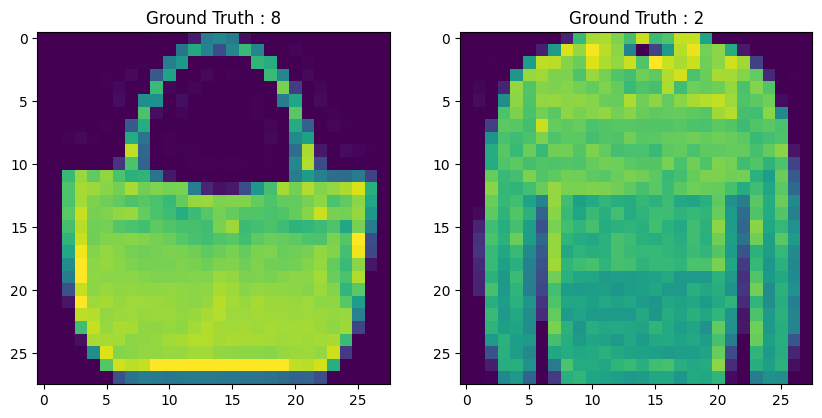

In [69]:
# garantindo que o dataset foi carregado corretamente - inspecionar

plt.figure(figsize=[10,10])

plt.subplot(121)
plt.imshow(train_images[100,:,:])
plt.title("Ground Truth : {}".format(train_labels[100]))

plt.subplot(122)
plt.imshow(test_images[20,:,:])
plt.title("Ground Truth : {}".format(test_labels[20]))

classes = np.unique(train_labels)
numero_classes = len(classes)
print('Número total de outputs : ', numero_classes)
print('Classes de saída : ', classes)


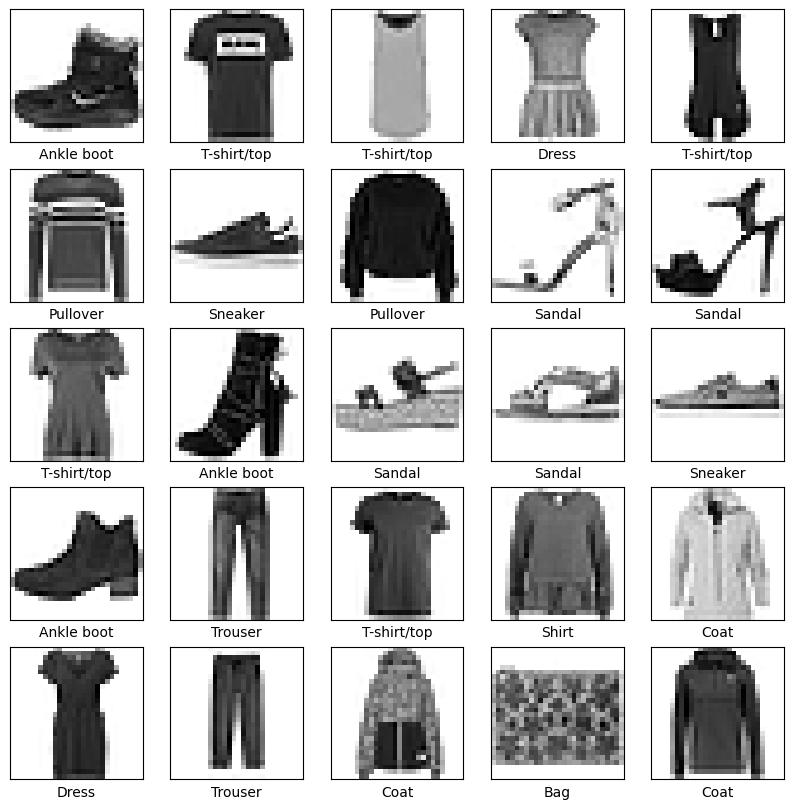

In [70]:
# normalizacao
# Normalização é o processo de ajustar os valores de um conjunto de dados para que fiquem dentro de uma faixa específica
# nesse caso, 255 (em escala de cinza ou para cada canal de cor em imagens RGB)
train_images = train_images / 255.0
test_images = test_images / 255.0

# define as classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# verificação do conjunto de treinamento
plt.figure(figsize=(10,10))     # 10x10
for image in range(25):         #primeiras 25 imagens do conjunto
    plt.subplot(5,5,image+1)
    plt.xticks([])              # retira marcações do eixo x
    plt.yticks([])              # retira marcações do eixo y
    plt.grid(False)             # oculta a grade
    plt.imshow(train_images[image], cmap=plt.cm.binary)   # exibe a imagem -> cmap=plt.cm.binary exibe a imagem em uma escala de cinza binária
    plt.xlabel(class_names[train_labels[image]])          # exibe o nome da classe correspondente à imagem como um rótulo abaixo dela.
plt.show()

Criação da CNN - modelo multicamadas

In [71]:
# test_size=0.2: define tamanho do conjunto de validação como 20% do total.
# 80% restante fica no conjunto de treinamento.

# random_state=13: define uma "semente" para a geração de números aleatórios.
# garante que a divisão seja reproduzível: cada vez que você executar o código com o mesmo random_state, obterá a mesma divisão dos dados.

train_images, imagem_validacao, train_labels, label_validacao = train_test_split(train_images, train_labels, test_size=0.2, random_state=13)

# Melhorar a reprodutibilidade
# fixa pseudo-random generator do numpy
np.random.RandomState(10)

# fixar o pseudo-random generator do tensorflow
tf.random.set_seed(10)

# Classificador MLP:
model = keras.Sequential()                                # cria um modelo sequencial - pilha linear de camadas
model.add(keras.layers.Flatten(input_shape=(28, 28,)))    # converte uma matriz 2D (28x28 pixels) em um vetor 1D (de 784 elementos).
model.add(Dense(128, activation='relu'))                  # camada totalmente conectada com 128 neurônios - ReLU (Rectified Linear Unit) é uma função de ativação
model.add(Dense(10, activation='softmax'))                # camada de saída, com 10 neurônios - função softmax

model.summary()

# ReLU retorna o valor da entrada se for positivo, ou 0 caso contrário. Isso ajuda a introduzir não-linearidades no modelo
# softmax transforma as saídas da camada em probabilidades (valores entre 0 e 1 que somam 1), permitindo que o modelo atribua uma probabilidade a cada classe

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
model.compile(optimizer='adam',                         # define o algoritmo de otimização que ajustará os pesos da rede neural durante o treinamento
              loss='sparse_categorical_crossentropy',   # função de perda mede a diferença entre as previsões do modelo e os rótulos reais, guiando o modelo a minimizar essa diferença
              metrics=['accuracy'])                     # define métricas para avaliar o desempenho do modelo durante o treinamento e a validação

# Adam ajusta a taxa de aprendizado automaticamente com base em momentos de primeira (média) e segunda ordem (variância) do gradiente
# sparse_categorical_crossentropy é usada para problemas de classificação multiclasse
# accuracy mede a porcentagem de previsões corretas feitas pelo modelo

In [73]:
# pega pesos iniciais

print("Primeiros 5 parâmetros antes do treino")
print(model.get_weights()[0][0])

Primeiros 5 parâmetros antes do treino
[ 0.01093898  0.04203023 -0.0741728   0.05882373  0.01379389 -0.02294532
 -0.05039898  0.07168169 -0.02798882 -0.05898462 -0.01313405  0.03229541
 -0.06358203  0.05487133  0.07820117  0.02159695  0.06009834  0.03011422
 -0.04967837 -0.04009417 -0.02011953 -0.02180273 -0.0049332  -0.0114421
  0.04514768 -0.02673841 -0.04886237  0.05020127 -0.07633115  0.06945188
  0.0775585  -0.0343245  -0.0782816  -0.0558768   0.00630879 -0.07307663
  0.07811625  0.05161612  0.07958966  0.06636032 -0.03917081 -0.07159698
 -0.03271168 -0.07871044 -0.06432508 -0.03847902  0.05736784  0.07798889
  0.07367416 -0.07861723 -0.02204632  0.01029422 -0.03709685 -0.05242932
  0.05642753 -0.0179415   0.07596243  0.04896975  0.08026702 -0.07880878
 -0.06483296 -0.0080194   0.01296324 -0.05079757  0.07281072 -0.05121555
  0.08018481  0.03438932 -0.0127961   0.02322876  0.00117598 -0.04957017
  0.05620205  0.05124003 -0.02021875  0.07782624  0.04753325 -0.05932318
  0.04298542 

In [74]:
# fixar estado de inicialização
history = model.fit(train_images, train_labels, epochs=10,
                           validation_data=(imagem_validacao, label_validacao),verbose= 1)

# batch size: número de exemplos de treinamento em uma passagem para frente/trás
# época/epoch: descreve o número de vezes que o algoritmo vê o conjunto de dados inteiro
# iteração: descreve o número de vezes que um lote de dados passou pelo algoritmo
# alterar verbose = 1 para visualizas as épocas de treinamento

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7708 - loss: 0.6518 - val_accuracy: 0.8414 - val_loss: 0.4543
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8535 - loss: 0.4052 - val_accuracy: 0.8583 - val_loss: 0.4030
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8688 - loss: 0.3594 - val_accuracy: 0.8661 - val_loss: 0.3758
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8777 - loss: 0.3315 - val_accuracy: 0.8707 - val_loss: 0.3640
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8867 - loss: 0.3091 - val_accuracy: 0.8732 - val_loss: 0.3590
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8924 - loss: 0.2909 - val_accuracy: 0.8770 - val_loss: 0.3423
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8968 - loss: 0.2777 - val_accuracy: 0.8804 - val_loss: 0.3400
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9017 - loss: 0.2647 

In [75]:
print("Primeiros 5 parâmetros APÓS o treino")
print(model.get_weights()[0][0])

Primeiros 5 parâmetros APÓS o treino
[-0.22363216 -0.08106516 -0.17421985  0.03805893 -0.10585033 -0.02294532
 -0.10913894  0.32555282  0.05424281 -0.2026293   0.01670345  0.03229541
  0.07230424  0.05872925  0.22974144  0.04116581  0.06009834  0.12612386
 -0.04967837 -0.08667355 -0.19909666 -0.02812262  0.23430942 -0.0114421
  0.18838304 -0.02673841 -0.09387601  0.05020127 -0.25289306  0.06945188
  0.0775585  -0.0343245  -0.14625466 -0.0558768  -0.2255328   0.15826972
  0.07811625  0.07332163  0.3551237   0.00699398 -0.0450416  -0.08888109
 -0.11712746 -0.00601978 -0.09308279 -0.05728024  0.05736784  0.07832354
 -0.05834216 -0.00324263 -0.02204632  0.16045992 -0.06890787 -0.24195932
  0.05642753 -0.08814314  0.4146496   0.04896975 -0.05877668 -0.07880878
 -0.18597285 -0.0080194   0.2466895  -0.05773873  0.0814172  -0.14014034
  0.06951078 -0.00969958  0.24471341  0.09768097 -0.11072985 -0.04222256
  0.02355019  0.13471104 -0.19216684  0.33159867 -0.0315645   0.17618081
 -0.0082441  -0

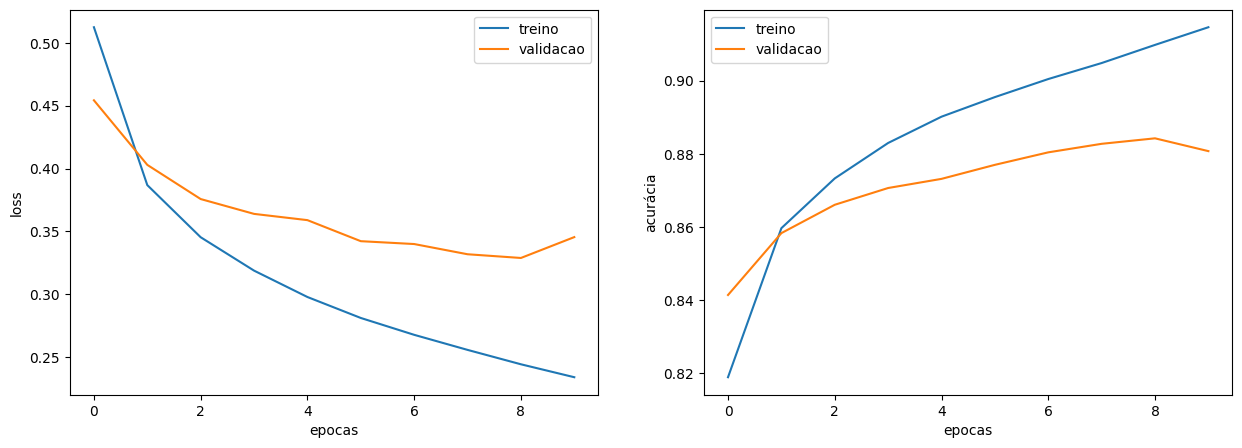

In [76]:
# plotagem dos gráficos de loss e acuracia

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="treino")
plt.plot(history.history["val_loss"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("loss")
plt.legend();
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="treino")
plt.plot(history.history["val_accuracy"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("acurácia")
plt.legend();

# acurácia no treinamento e validação deve aumentar ao longo do tempo!
# modelo que aprende bem deve ter acurácia de validação aproximando-se da de treinamento
# acurácia de treinamento continua aumentando, mas a acurácia de validação se estabiliza ou diminui, o modelo está overfitting
# overffiting: ajustou demais aos dados de treinamento, e perdeu a capacidade de generalizar

# loss deve diminuir ao longo do treinamento, indicando que o modelo está aprendendo
# quando a perda no treinamento é muito baixa, mas a perda na validação é alta ou aumenta, pode ser overfitting
# se loss de treinamento e de validação permanecerem altas, o modelo pode estar underfitting
# underffiting: não está aprendendo bem, possivelmente devido a um modelo muito simples ou falta de dados

# no caso do modelo atual, a loss está diminuindo no treinamento, indicando aprendizagem - mesmo que não esteja diminuindo totalmente na validação,
# a loss de treinamento é baixa o suficiente para não sugerir overfitting
# j´pa no caso da acurácia, a taxa de validação está estabilizando, o que pode sim indicar um overfitting


In [77]:
from sklearn.metrics import classification_report

predicted_classes = model.predict(test_images)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

predicted_classes.shape, test_labels.shape

target_names = ["Class {}".format(i) for i in range(10)]

print(classification_report(test_labels, predicted_classes, target_names=target_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.69      0.84      0.76      1000
     Class 1       0.99      0.98      0.98      1000
     Class 2       0.86      0.65      0.74      1000
     Class 3       0.92      0.85      0.89      1000
     Class 4       0.69      0.89      0.78      1000
     Class 5       0.99      0.94      0.96      1000
     Class 6       0.74      0.63      0.68      1000
     Class 7       0.94      0.95      0.94      1000
     Class 8       0.99      0.95      0.97      1000
     Class 9       0.93      0.97      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



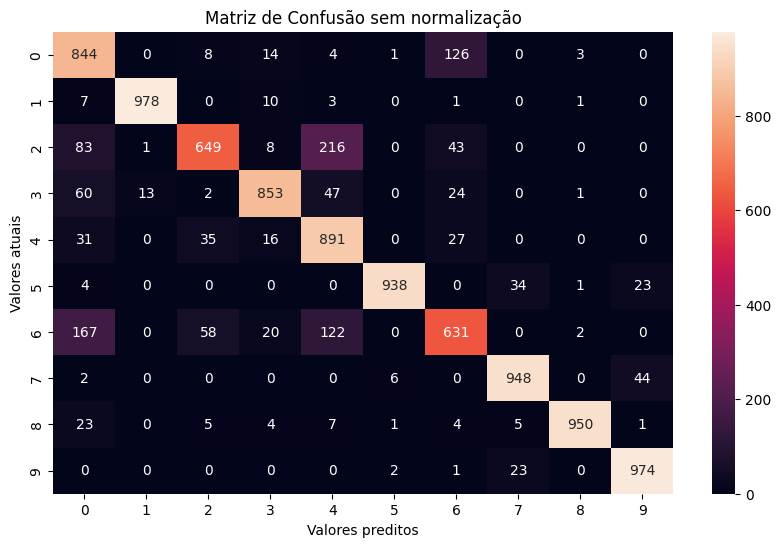

In [78]:
# criacao da matriz de confusao

from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(test_labels, predicted_classes)

# criacao de dataframe para a matriz de confusão formatada em array (facilita plotagem)

matriz_confusao_df = pd.DataFrame(matriz_confusao,
                     index = ['0','1','2','3','4', '5', '6', '7', '8', '9' ],
                     columns = ['0','1','2','3','4', '5', '6', '7', '8', '9' ])

plt.figure(figsize=(10,6))
sns.heatmap(matriz_confusao_df, annot=True,fmt="d")
plt.title('Matriz de Confusão sem normalização')
plt.ylabel('Valores atuais')
plt.xlabel('Valores preditos')
plt.show()

# diagonal principal tem os acertos do modelo (classificações corretas) - tudo o que está fora, são erros
# logo, o modelo teve um bom desempenho geral, com excessão das classificações 0, 4 e 6, que tiveram quantidade maior de erros